In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error


In [2]:
data = pd.read_csv('Stock_data.csv')
data = data[['Date', 'Close']] 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])
train_size = int(len(data) * 0.80)
train_data = data[:train_size]
test_data = data[train_size:]
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length]['Close'].values
        label = data.iloc[i+sequence_length]['Close']
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)
sequence_length = 10  
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict stock prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/50
51/51 [==============================] - 3s 9ms/step - loss: 0.0273
Epoch 2/50
51/51 [==============================] - 1s 10ms/step - loss: 9.1233e-04
Epoch 3/50
51/51 [==============================] - 1s 10ms/step - loss: 6.4174e-04
Epoch 4/50
51/51 [==============================] - 0s 10ms/step - loss: 5.9877e-04
Epoch 5/50
51/51 [==============================] - 1s 10ms/step - loss: 6.0599e-04
Epoch 6/50
51/51 [==============================] - 1s 10ms/step - loss: 5.5086e-04
Epoch 7/50
51/51 [==============================] - 1s 10ms/step - loss: 5.3469e-04
Epoch 8/50
51/51 [==============================] - 1s 10ms/step - loss: 5.4193e-04
Epoch 9/50
51/51 [==============================] - 1s 10ms/step - loss: 5.2012e-04
Epoch 10/50
51/51 [==============================] - 0s 10ms/step - loss: 5.1635e-04
Epoch 11/50
51/51 [==============================] - 1s 10ms/step - loss: 4.9832e-04
Epoch 12/50
51/51 [==============================] - 1s 10ms/step - loss: 4.719

Mean Absolute Error: 2.2520921721566536


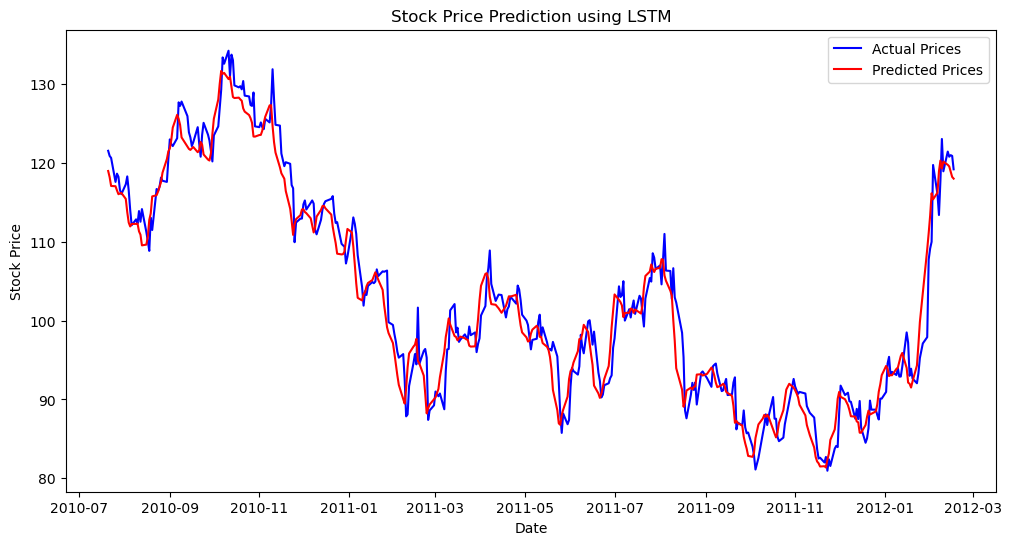

In [3]:
mae = mean_absolute_error(actual_prices, predicted_prices)
print(f"Mean Absolute Error: {mae}")

plt.figure(figsize=(12, 6))
plt.plot(test_data.index[-len(predicted_prices):], actual_prices, label='Actual Prices', color='blue')
plt.plot(test_data.index[-len(predicted_prices):], predicted_prices, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()
